# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом.



## Откройте таблицу и изучите общую информацию о данных

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [ ]:
data.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [ ]:
data['days_employed'] = data['days_employed'].abs()

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [ ]:
data['education'] = data['education'].str.lower()

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [ ]:
data[data['children']== 5].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
3979,5,1572.328285,42,среднее,1,гражданский брак,1,M,сотрудник,0,142594,на покупку своего автомобиля,C,операции с автомобилем
4397,5,3248.839837,36,среднее,1,женат / замужем,0,F,компаньон,0,168460,операции с недвижимостью,C,операции с недвижимостью
7866,5,773.124856,36,среднее,1,женат / замужем,0,F,сотрудник,0,48772,операции с жильем,D,операции с недвижимостью
15822,5,418.199982,31,среднее,1,женат / замужем,0,F,сотрудник,0,77552,сделка с подержанным автомобилем,C,операции с автомобилем
15916,5,2286.262752,37,среднее,1,женат / замужем,0,F,сотрудник,0,256698,покупка недвижимости,B,операции с недвижимостью
16211,5,387.317579,35,среднее,1,гражданский брак,1,F,госслужащий,0,126102,на проведение свадьбы,C,проведение свадьбы
20452,5,268.425464,38,начальное,3,женат / замужем,0,F,сотрудник,0,212545,заняться высшим образованием,B,получение образования
20837,5,2386.600221,35,среднее,1,женат / замужем,0,F,компаньон,0,204241,жилье,B,операции с недвижимостью
21156,5,1690.018117,59,среднее,1,женат / замужем,0,M,сотрудник,0,269068,операции со своей недвижимостью,B,операции с недвижимостью


### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
import seaborn as sns

In [ ]:
debt_pivot = pd.pivot_table(data, index='children', values='debt', aggfunc=['sum', 'count', 'mean'])
debt_pivot.columns = ['sum', 'debt', 'mean']
debt_pivot.style.format({'mean': '{:,.2%}'.format,})

,sum,debt,mean
children,,,
0,1063,14091,7.54%
1,444,4808,9.23%
2,194,2052,9.45%
3,27,330,8.18%
4,4,41,9.76%
5,0,9,0.00%


In [ ]:
children_zero = ((len(data[(data['children']== 0) & (data['debt']== 1)])\
      / len(data[(data['children']== 0) & (data['debt']== 0)])*100))

In [ ]:
children_zero = ((len(data[(data['children']== 0) & (data['debt']== 1)])\
      / len(data[(data['children']== 0) & (data['debt']== 0)])*100))
children_one = (len(data[(data['children']== 1) & (data['debt']== 1)])\
      / len(data[(data['children']== 1) & (data['debt']== 0)])*100)
children_two = (len(data[(data['children']== 2) & (data['debt']== 1)])\
      / len(data[(data['children']== 2) & (data['debt']== 0)])*100)
children_three = (len(data[(data['children']== 3) & (data['debt']== 1)])\
      / len(data[(data['children']== 3) & (data['debt']== 0)])*100)
children_four = (len(data[(data['children']== 4) & (data['debt']== 1)])\
      / len(data[(data['children']== 4) & (data['debt']== 0)])*100)
children_five = (len(data[(data['children']== 5) & (data['debt']== 1)])\
      / len(data[(data['children']== 5) & (data['debt']== 0)])*100)

In [ ]:
print (f"Процент должников по кредиту в подкатегории 0 детей: {children_zero:.2f}")
print (f"Процент должников по кредиту в подкатегории 1 детей: {children_one:.2f}")
print (f"Процент должников по кредиту в подкатегории 2 детей: {children_two:.2f}")
print (f"Процент должников по кредиту в подкатегории 3 детей: {children_three:.2f}")
print (f"Процент должников по кредиту в подкатегории 4 детей: {children_four:.2f}")
print (f"Процент должников по кредиту в подкатегории 5 детей: {children_five:.2f}")

Процент должников по кредиту в подкатегории 0 детей: 8.16
Процент должников по кредиту в подкатегории 1 детей: 10.17
Процент должников по кредиту в подкатегории 2 детей: 10.44
Процент должников по кредиту в подкатегории 3 детей: 8.91
Процент должников по кредиту в подкатегории 4 детей: 10.81
Процент должников по кредиту в подкатегории 5 детей: 0.00


<AxesSubplot:xlabel='children', ylabel='debt'>

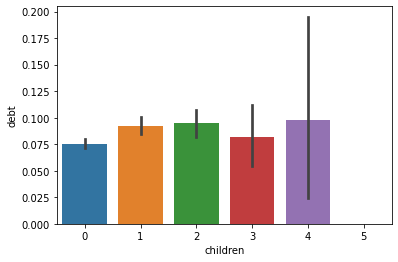

In [ ]:
sns.barplot(data=data, x='children', y='debt');

Вывод: изучив зависимость, можем увидеть, что при наличии от 0 до 4 детей в семье, процент задолженности по кредиту разнизца от 8.16 до 10.81 и разница не превышает 3х процентов. Однако, при наличии 5 детей в семье, просрочек по кредиту вообще нет, что вызывает вопросы. Либо не достаточно данных по данной подкатегории, либо данные заемщики более ответвенные.  

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
family_status_zero = (len(data[(data['family_status']== 'женат / замужем') & (data['debt']== 1)])\
      / len(data[(data['family_status']== 'женат / замужем') & (data['debt']== 0)])*100)
family_status_one = (len(data[(data['family_status']== 'гражданский брак') & (data['debt']== 1)])\
      / len(data[(data['family_status']== 'гражданский брак') & (data['debt']== 0)])*100)
family_status_two = (len(data[(data['family_status']== 'вдовец / вдова') & (data['debt']== 1)])\
      / len(data[(data['family_status']== 'вдовец / вдова') & (data['debt']== 0)])*100)
family_status_three = (len(data[(data['family_status']== 'в разводе') & (data['debt']== 1)])\
      / len(data[(data['family_status']== 'в разводе') & (data['debt']== 0)])*100)
family_status_four = (len(data[(data['family_status']== 'Не женат / не замужем') & (data['debt']== 1)])\
      / len(data[(data['family_status']== 'Не женат / не замужем') & (data['debt']== 0)])*100)

In [ ]:
print (f"Процент должников по кредиту в подкатегории женат / замужем: {family_status_zero:.2f}")
print (f"Процент должников по кредиту в подкатегории гражданский брак: {family_status_one:.2f}")
print (f"Процент должников по кредиту в подкатегории вдовец / вдова: {family_status_two:.2f}")
print (f"Процент должников по кредиту в подкатегории в разводе: {family_status_three:.2f}")
print (f"Процент должников по кредиту в подкатегории Не женат / не замужем: {family_status_four:.2f}")

Процент должников по кредиту в подкатегории женат / замужем: 8.18
Процент должников по кредиту в подкатегории гражданский брак: 10.27
Процент должников по кредиту в подкатегории вдовец / вдова: 7.09
Процент должников по кредиту в подкатегории в разводе: 7.60
Процент должников по кредиту в подкатегории Не женат / не замужем: 10.82


[Text(0, 0, 'женат / замужем'),
 Text(1, 0, 'гражданский брак'),
 Text(2, 0, 'вдовец / вдова'),
 Text(3, 0, 'в разводе'),
 Text(4, 0, 'Не женат / не замужем')]

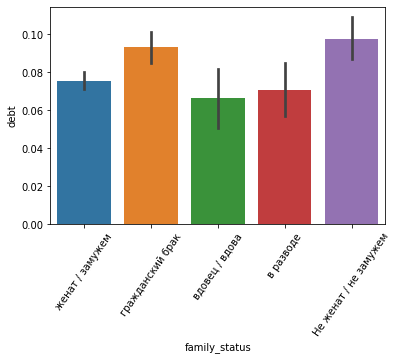

In [ ]:
family_status = sns.barplot(data=data, x='family_status', y='debt')
family_status.set_xticklabels(family_status.get_xticklabels(), rotation=55);

**Вывод:** В категории "Семейный статус" маркер "вдовец\вдова","в разводе", "женат / замужем"  имеют меньший процент задолжености, по кредитам чем, "Не женат / не замужем", "гражданский брак".

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
total_income_category_zero = (len(data[(data['total_income_category']== 'E') & (data['debt']== 1)])\
      / len(data[(data['total_income_category']== 'E') & (data['debt']== 0)])*100)
total_income_category_one = (len(data[(data['total_income_category']== 'D') & (data['debt']== 1)])\
      / len(data[(data['total_income_category']== 'D') & (data['debt']== 0)])*100)
total_income_category_two = (len(data[(data['total_income_category']== 'C') & (data['debt']== 1)])\
      / len(data[(data['total_income_category']== 'C') & (data['debt']== 0)])*100)
total_income_category_three = (len(data[(data['total_income_category']== 'B') & (data['debt']== 1)])\
      / len(data[(data['total_income_category']== 'B') & (data['debt']== 0)])*100)
total_income_category_four = (len(data[(data['total_income_category']== 'A') & (data['debt']== 1)])\
      / len(data[(data['total_income_category']== 'A') & (data['debt']== 0)])*100)

In [ ]:
print (f"Процент должников по кредиту в подкатегории E: {total_income_category_zero:.2f}")
print (f"Процент должников по кредиту в подкатегории D: {total_income_category_one:.2f}")
print (f"Процент должников по кредиту в подкатегории C: {total_income_category_two:.2f}")
print (f"Процент должников по кредиту в подкатегории B: {total_income_category_three:.2f}")
print (f"Процент должников по кредиту в подкатегории A: {total_income_category_four:.2f}")

Процент должников по кредиту в подкатегории E: 10.00
Процент должников по кредиту в подкатегории D: 6.40
Процент должников по кредиту в подкатегории C: 9.29
Процент должников по кредиту в подкатегории B: 7.60
Процент должников по кредиту в подкатегории A: 8.70


<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

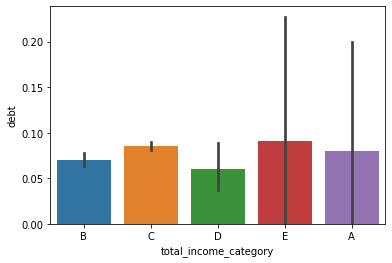

In [ ]:
sns.barplot(data=data, x='total_income_category', y='debt')

**Вывод:** Прямой зависимости между уровнем дохода и возратом кредита в срок - нет. Однако, Подкатегория "Е" имеется самый большой процент задолжености, а категория "D" наооборот имеет меньше всех задолженности по кредитам.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
purpose_category_zero = (len(data[(data['purpose_category']== 'операции с недвижимостью') & (data['debt']== 1)])\
      / len(data[(data['purpose_category']== 'операции с недвижимостью') & (data['debt']== 0)])*100)
purpose_category_one = (len(data[(data['purpose_category']== 'операции с автомобилем') & (data['debt']== 1)])\
      / len(data[(data['purpose_category']== 'операции с автомобилем') & (data['debt']== 0)])*100)
purpose_category_two = (len(data[(data['purpose_category']== 'получение образования') & (data['debt']== 1)])\
      / len(data[(data['purpose_category']== 'получение образования') & (data['debt']== 0)])*100)
purpose_category_three = (len(data[(data['purpose_category']== 'проведение свадьбы') & (data['debt']== 1)])\
      / len(data[(data['purpose_category']== 'проведение свадьбы') & (data['debt']== 0)])*100)

In [ ]:
print (f"Процент должников по кредиту в подкатегории операции с недвижимостью: {purpose_category_zero:.2f}")
print (f"Процент должников по кредиту в подкатегории операции с автомобилем: {purpose_category_one:.2f}")
print (f"Процент должников по кредиту в подкатегории получение образования: {purpose_category_two:.2f}")
print (f"Процент должников по кредиту в подкатегории проведение свадьбы: {purpose_category_three:.2f}")

Процент должников по кредиту в подкатегории операции с недвижимостью: 7.82
Процент должников по кредиту в подкатегории операции с автомобилем: 10.31
Процент должников по кредиту в подкатегории получение образования: 10.20
Процент должников по кредиту в подкатегории проведение свадьбы: 8.59


[Text(0, 0, 'операции с недвижимостью'),
 Text(1, 0, 'операции с автомобилем'),
 Text(2, 0, 'получение образования'),
 Text(3, 0, 'проведение свадьбы')]

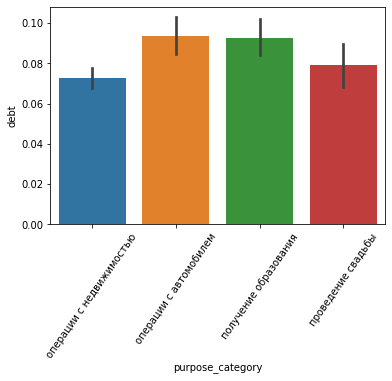

In [ ]:
purpose_category = sns.barplot(data=data, x='purpose_category', y='debt')
purpose_category.set_xticklabels(purpose_category.get_xticklabels(), rotation=55);

**Вывод:** операции с недвижимостью имеют самый низкий процент задолженности. Возможно, это связано с тем, что кредит берется под залог покупаемой недвижимости. Проведение свадьбы имеет большей возрат, из-за небольшой суммы кредита? А получение образования и операции с автомобилем берутся без залога.  

<div  style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
По образованию, я понимаю так. Люди замотивированны. Но из-за наличия обучения, они не могут тратить дополнительно время на заработок. Из-за этого, они допускают просрочки. Очень сложно совмещать учебу, работу, личную жизнь. Если бы была бы возможность, стоило бы иследовать погашение по этим кредита. Т.е. гасят ли заемщики его вообще. Если да, то возможно это прибыльнее, т.к. банк берет ещё проценты.</div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*
Пропуски находятся в стоблцах days_employed и total_income. Колличество пропусков одинковое и находятся они одноверменно в двух столцах.
Возможно, это связано с типом данных float64. Это единственные столбцы с этим типом данных, мне кажется по идеи это должны быть данные типа int. И возможно, пропуски появляются из-за больших значенией в строках.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медиана разбивает данные на 2 части, по середине. Среднее арифметическое же, будет неккоректным, из-за разницы в доходах многих людей. Так например, в данных может быть 10 человек с доходом в 100т.рублей и 1 с 1миллион. Среднее будет 188т. Если мы добавим среднее, то подсчеты будут некоректными и не будут отображать действительность.

### Шаг 4: общий вывод.

Вывод:
Мною было проведено иследование на факт то, влиет семейное положени и колличество детей на погашение кредита.

    Наши гипотезы:
    - Влияет ли количество детей на факт погашения кредита
    - Влияет ли семейное положение на факт погашения кредита
    - Влияет ли уровень дохода на факт погашения кредита
    - Влияет ли цель кредита на факт погашения кредита


Влияние детей в семьее на факт погашения кредита.
    Да, влияет. Наличие детей увеличивает шанс не уплаты по кредиту в средне на 1.5%. Тогда как процент неуплаты без детей = 8.16%. Мое мнение, что это связано с тем, расходы на детей нельзя спрогнозировать. А так же это дополнительная нагрузка на семейный бюджет. Так же не достаточно данных по клиентам с 5 детьми. В категории с 5ю детьми просрочек по кредитам нет.


In [ ]:
debt_pivot = pd.pivot_table(data, index='children', values='debt', aggfunc=['sum', 'count', 'mean'])
debt_pivot.columns = ['сумма_должников', 'количесво_заемщиков', 'Процент_должников']
debt_pivot.style.format({'Процент_должников': '{:,.2%}'.format,})


,сумма_должников,количесво_заемщиков,Процент_должников
children,,,
0,1063,14091,7.54%
1,444,4808,9.23%
2,194,2052,9.45%
3,27,330,8.18%
4,4,41,9.76%
5,0,9,0.00%


Влияние семейного положения на факт погашения кредита:
    Люди, которые были или жена в данный момент. Относятся более ответвенно к погашению кредита, нежеле катагории, которые не закрепили свои отношения официально или не женаты.

In [ ]:
debt_pivot = pd.pivot_table(data, index='family_status', values='debt', aggfunc=['sum', 'count', 'mean'])
debt_pivot.columns = ['сумма_должников', 'количесво_заемщиков', 'Процент_должников']
debt_pivot.style.format({'Процент_должников': '{:,.2%}'.format,})


,сумма_должников,количесво_заемщиков,Процент_должников
family_status,,,
Не женат / не замужем,273,2796,9.76%
в разводе,84,1189,7.06%
вдовец / вдова,63,951,6.62%
гражданский брак,385,4134,9.31%
женат / замужем,927,12261,7.56%


Влияет ли уровень дохода на факт погашения кредита?:
    Зависимости от уровня дохода и погашения кредита в срок нет. Категория доходов D имеет самый маленький процент просрочки. Скорее всего, это связано с тем, что они получают зарплату и им проще планировать свой бюджет. Но так же и с тем, что по данной категории не достаточно данных.
    Категория С имеет наивысший рейтинг не погашения кредита. Скорее всего, это связано с большим количеством данных.
    Категория А имеет самый большой доход, но так же имеет 8% должников. Мало данных по данной категории. Сделать выводы невозможно.

In [ ]:
debt_pivot = pd.pivot_table(data, index='total_income_category', values='debt', aggfunc=['sum', 'count', 'mean'])
debt_pivot.columns = ['сумма_должников', 'количесво_заемщиков', 'Процент_должников']
debt_pivot.style.format({'Процент_должников': '{:,.2%}'.format,})


,сумма_должников,количесво_заемщиков,Процент_должников
total_income_category,,,
A,2,25,8.00%
B,354,5014,7.06%
C,1353,15921,8.50%
D,21,349,6.02%
E,2,22,9.09%


Влияет ли цель кредита на факт погашения кредита?:
    Да, влияет. Цели "операции с недвижимостью", "проведение свадьбы" имею наименьший процент просрочек по кредитам. Мое мнение такого, что "операции с недвижимостью" - это долгая инвестиция, а так же, более стабильная цель. Ещё, скорее всего, "операции с недвижимостью" делаются под залог этой недвижемости. Что побуждает заемщиков быть более ответсвенными.
    Цель "проведение свадьбы", так же имеет меньший процент просрочек. Я связываю это с тем, что сумма на проведение свадьбы не большая, что упрощает её погашение. Так же, смотря на прошлое иследование влияния семейного статуса, женатые пары более ответвенно относятся к своим долговым обязательствам.
    Цели "операции с автомобилем" и "получение образования" являются менее стабильными и требуют большие суммые. Автомобили, в целом не стабильная цель, т.к. может сломаться, особенно поддержанный. А получение образования сложно совмещать с работой и личной жизнь, из-за чего допускаются просрочки.

In [ ]:
debt_pivot = pd.pivot_table(data, index='purpose_category', values='debt', aggfunc=['sum', 'count', 'mean'])
debt_pivot.columns = ['сумма_должников', 'количесво_заемщиков', 'Процент_должников']
debt_pivot.style.format({'Процент_должников': '{:,.2%}'.format,})

,сумма_должников,количесво_заемщиков,Процент_должников
purpose_category,,,
операции с автомобилем,400,4279,9.35%
операции с недвижимостью,780,10751,7.26%
получение образования,369,3988,9.25%
проведение свадьбы,183,2313,7.91%


Общий вывод: При построение кредитного скролинга, стоит взять за результаты иследования семейного статуса и целей кредита. Так же, можно частично взять выводы про количество детей от 0 до 3х. По 4 и 5 детям в семье, недостаточно данных.
Так же нужно собрать больше данных и провести дополнительные исследования по гипотезе 3.